Exploration de méthodes OpenCV pour la détection d’un pneu

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

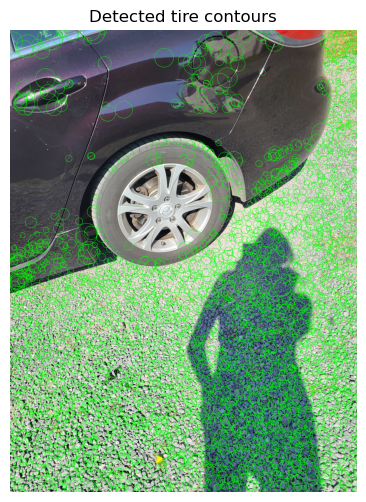

In [2]:
# Load the image
image = cv2.imread('pneu1.jpg')

if image is None:
    raise FileNotFoundError("The image 'pneu1.jpg' was not found in the current directory.")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges
edges = cv2.Canny(blurred, 50, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define expected tire radius range
min_radius = 20
max_radius = 100

# Draw circles on the original image
for contour in contours:
    (x, y), radius = cv2.minEnclosingCircle(contour)
    if min_radius < radius < max_radius:
        cv2.circle(image, (int(x), int(y)), int(radius), (0, 255, 0), 2)

# Convert BGR → RGB for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display inside the notebook
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Detected tire contours")
plt.show()


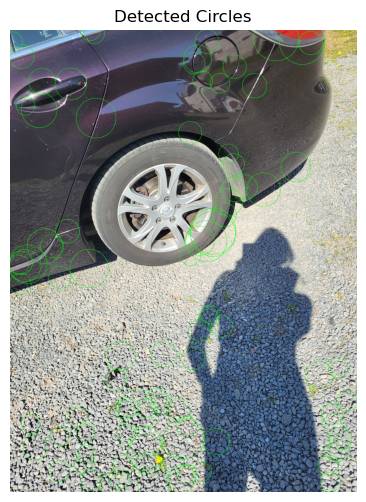

In [6]:
# Load the image
image2 = cv2.imread('pneu1.jpg')

if image2 is None:
    raise FileNotFoundError("The image 'pneu1.jpg' was not found in the current directory.")

# Convert to grayscale
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred2 = cv2.GaussianBlur(gray2, (5, 5), 0)

# Detect edges
edges2 = cv2.Canny(blurred2, 100, 200)

# Find contours
contours, _ = cv2.findContours(edges2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Radius range (must not be equal)
min_radius = 80
max_radius = 200

# Draw circles
for contour in contours:
    (x, y), radius = cv2.minEnclosingCircle(contour)
    if min_radius < radius < max_radius:
        cv2.circle(image2, (int(x), int(y)), int(radius), (0, 255, 0), 2)

# Convert for display
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Show result
plt.figure(figsize=(6, 6))
plt.imshow(image2_rgb)
plt.title("Detected Circles")
plt.axis("off")
plt.show()


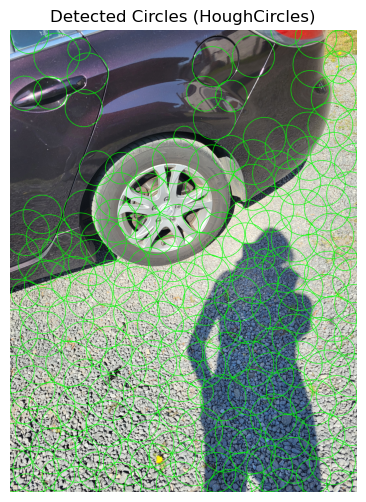

In [7]:
# Load the image
image3 = cv2.imread('pneu1.jpg')

if image3 is None:
    raise FileNotFoundError("The image 'pneu1.jpg' was not found in the current directory.")

# Convert to grayscale
gray3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# Define radius range
min_radius = 80
max_radius = 200

# Apply Gaussian blur (stronger blur helps HoughCircles)
blurred3 = cv2.GaussianBlur(gray3, (9, 9), 2)

# Detect circles with Hough Transform
circles = cv2.HoughCircles(
    blurred3,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=200,
    param1=50,
    param2=30,
    minRadius=min_radius,
    maxRadius=max_radius
)

# Draw detected circles on image3
if circles is not None:
    circles = np.round(circles[0]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image3, (x, y), r, (0, 255, 0), 4)

# Convert to RGB for display
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

# Show result
plt.figure(figsize=(6, 6))
plt.imshow(image3_rgb)
plt.title("Detected Circles (HoughCircles)")
plt.axis("off")
plt.show()


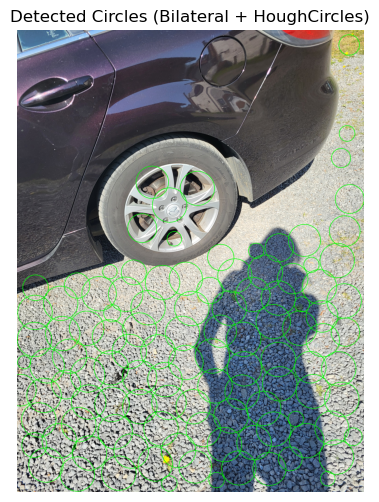

In [8]:
# Load the image
image4 = cv2.imread('pneu1.jpg')

if image4 is None:
    raise FileNotFoundError("The image 'pneu1.jpg' was not found in the current directory.")

# Convert to grayscale
gray4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter (preserves edges carefully)
blurred4 = cv2.bilateralFilter(gray4, 9, 75, 75)

# Detect circles using Hough Transform
circles = cv2.HoughCircles(
    blurred4,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=200,
    param1=100,
    param2=50,
    minRadius=50,
    maxRadius=150
)

# Draw detected circles
if circles is not None:
    circles = np.round(circles[0]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image4, (x, y), r, (0, 255, 0), 4)
else:
    print("No circles detected with current parameters.")

# Convert BGR → RGB for Matplotlib display
image4_rgb = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

# Display result
plt.figure(figsize=(6, 6))
plt.imshow(image4_rgb)
plt.title("Detected Circles (Bilateral + HoughCircles)")
plt.axis("off")
plt.show()


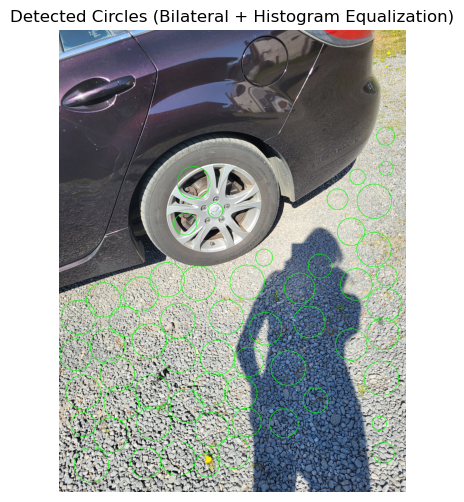

In [12]:
# Load the image
image5 = cv2.imread('pneu1.jpg')

if image5 is None:
    raise FileNotFoundError("The image 'pneu1.jpg' was not found in the current directory.")

# Convert to grayscale
gray5 = cv2.cvtColor(image5, cv2.COLOR_BGR2GRAY)

# Apply a bilateral filter to reduce noise while preserving edges
blurred5 = cv2.bilateralFilter(gray5, 9, 75, 75)

# Apply histogram equalization to enhance contrast
equalized = cv2.equalizeHist(blurred5)

# Detect circles using HoughCircles with tuned parameters
circles = cv2.HoughCircles(
    equalized,
    cv2.HOUGH_GRADIENT,
    dp=1.1,
    minDist=250,
    param1=120,
    param2=60,
    minRadius=60,
    maxRadius=150
)

# Draw detected circles on the original image
if circles is not None:
    circles = np.round(circles[0]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image5, (x, y), r, (0, 255, 0), 4)
else:
    print("No circles detected with current parameters.")

# Convert BGR → RGB for Matplotlib display
image5_rgb = cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(image5_rgb)
plt.title("Detected Circles (Bilateral + Histogram Equalization)")
plt.axis("off")
plt.show()


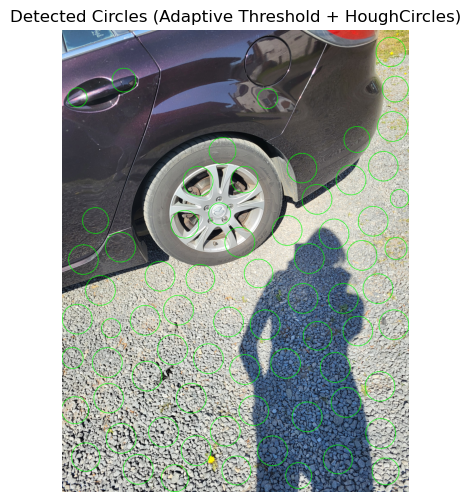

In [13]:
# Load the image
image6 = cv2.imread('pneu1.jpg')

if image6 is None:
    raise FileNotFoundError("The image 'pneu1.jpg' was not found in the current directory.")

# Convert to grayscale
gray6 = cv2.cvtColor(image6, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to smooth the image
blurred6 = cv2.GaussianBlur(gray6, (9, 9), 2)

# Apply adaptive thresholding to improve edge contrast
thresh = cv2.adaptiveThreshold(
    blurred6,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11,
    2
)

# Detect circles using Hough Transform
circles = cv2.HoughCircles(
    thresh,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=300,
    param1=100,
    param2=50,
    minRadius=70,
    maxRadius=130
)

# Draw detected circles on the original image
if circles is not None:
    circles = np.round(circles[0]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image6, (x, y), r, (0, 255, 0), 4)
else:
    print("No circles detected with current parameters.")

# Convert BGR → RGB for display
image6_rgb = cv2.cvtColor(image6, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(6, 6))
plt.imshow(image6_rgb)
plt.title("Detected Circles (Adaptive Threshold + HoughCircles)")
plt.axis("off")
plt.show()


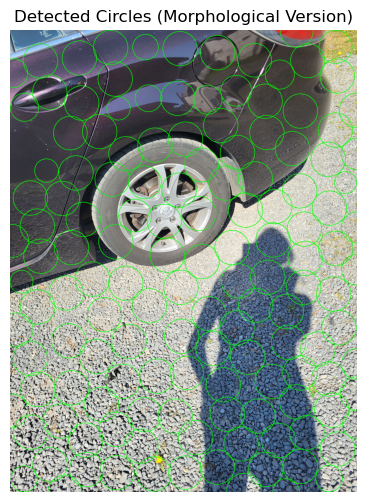

In [14]:
# Load the image
image7 = cv2.imread('pneu1.jpg')

if image7 is None:
    raise FileNotFoundError("The image 'pneu1.jpg' was not found in the current directory.")

# Convert to grayscale
gray7 = cv2.cvtColor(image7, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred7 = cv2.GaussianBlur(gray7, (9, 9), 2)

# Adaptive thresholding
thresh2 = cv2.adaptiveThreshold(
    blurred7,
    255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY_INV,    # TEST: version inversée !
    11,
    2
)

# NEW: Morphological closing to join broken circular edges
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
closed = cv2.morphologyEx(thresh2, cv2.MORPH_CLOSE, kernel)

# Detect circles on the morphologically-enhanced mask
circles = cv2.HoughCircles(
    closed,
    cv2.HOUGH_GRADIENT,
    dp=1.3,
    minDist=250,
    param1=120,
    param2=40,
    minRadius=70,
    maxRadius=150
)

# Draw detected circles
if circles is not None:
    circles = np.round(circles[0]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image7, (x, y), r, (0, 255, 0), 4)
else:
    print("No circles detected with current parameters.")

# Display
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image7, cv2.COLOR_BGR2RGB))
plt.title("Detected Circles (Morphological Version)")
plt.axis("off")
plt.show()
